##  Case Study on Regression
##### The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso

In [3]:
df=pd.read_csv(r"C:\Users\jubie\Downloads\car_age_price.csv")
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
df.shape

(112, 2)

In [5]:
df.describe

<bound method NDFrame.describe of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [6]:
df.dtypes

Year     int64
Price    int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
df.isnull().sum() # to find missing values

Year     0
Price    0
dtype: int64

### Correlation using heatmap

<AxesSubplot: >

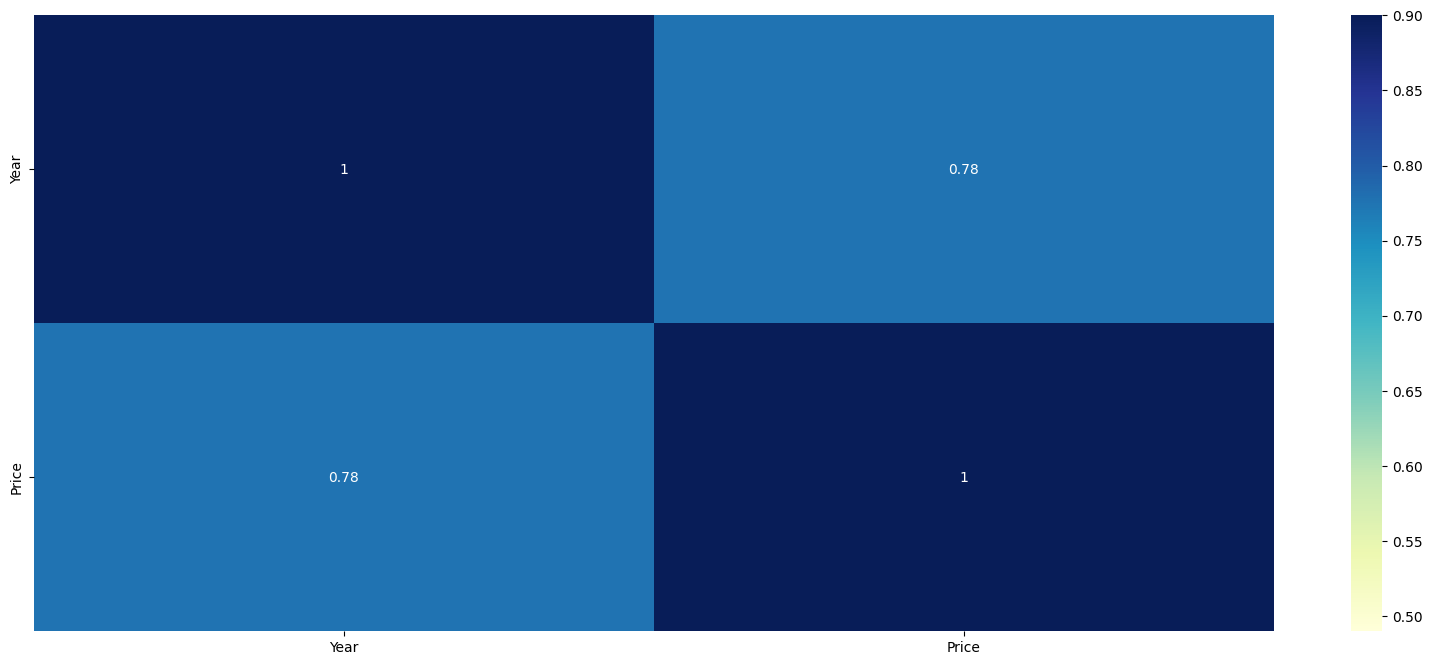

In [9]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=0.49,vmax=0.9,cmap='YlGnBu')


In [10]:
df.columns

Index(['Year', 'Price'], dtype='object')

### to find linear regression (model building and evaluation)

In [11]:
#splitting data into features and target
#y= o/p
y=df['Price']# target/o/p
X=df.drop(['Price'],axis=1)


In [12]:
#split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
# to find linear fit
lr= LinearRegression()

In [14]:
model=lr.fit(X_train,y_train)

In [15]:
y_pred=model.predict(X_test)

In [16]:
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R squared value is : ',r2_score(y_test,y_pred))

MSE is :  3844344327.03303
R squared value is :  0.5055201001234417


### Not bad, we are getting approx. 50% r-squared with all the variables. 

## Lasso Regression

In [17]:
#train the model
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)

In [18]:
#calculate Mean squarred value
mean_squared_error=np.mean((y_pred1-y_test)**2)
print("Mean Squared error on test set",mean_squared_error)
lasso_coeff=pd.DataFrame()
lasso_coeff['Columns']=X_train.columns
lasso_coeff['Coefficient Estimate']=pd.Series(lasso.coef_)

print(lasso_coeff)


Mean Squared error on test set 3844321783.8186545
  Columns  Coefficient Estimate
0    Year          46830.994407


In [19]:
print('R squared Value = ',r2_score(y_test,y_pred1))

R squared Value =  0.5055229997509045


C:\Users\jubie\AppData\Local\Temp\ipykernel_1996\2974963959.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


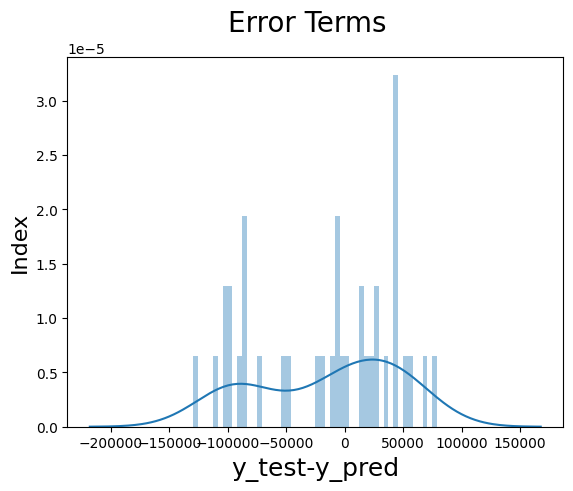

In [20]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [21]:
print("number of features used: %d" % np.sum(lasso.coef_ !=0))


number of features used: 1


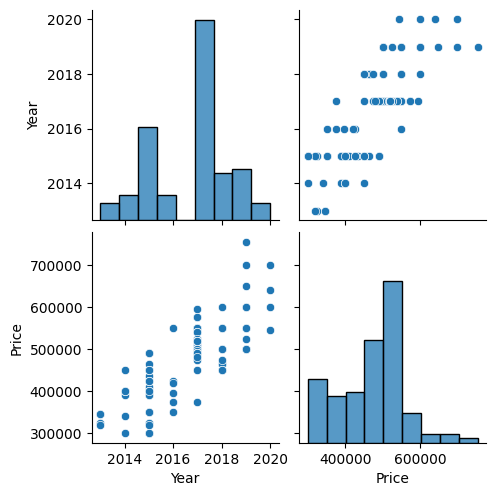

In [22]:
sns.pairplot(df)

In [ ]:
Inference: R-sqaured - 0.5055229997509045  explained.Both regression give same values.